
<marquee style='width: 50%; color: green;'><b><I><p>We are making use the following Machine Learning Algorithm :</p>
1.LogisticRegression<br>
2.DecisionTreeClassifier<br>
3.RandomForestClassifier<br>
4.SVC<br>
5.KNeighborsClassifier<br>
6.DecisionTreeClassifier<br>
7.GradientBoostingClassifier<br>
8.Naive Bayes<br>
9.neural networks<br>

</b></marquee>

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline



---


<marquee style='width: 50%; color: green;'><b><I><p>Conquering CSVs in Google Colab:</p>
When you’re loading a CSV file into a DataFrame  and it’s not displaying correctly, it’s often due to the delimiter used in your data. If your data is separated by semicolons (;), you need to specify that when reading the CSV file with pandas.</I></b></marquee>


---



In [21]:
df=pd.read_csv("/content/bank.csv", delimiter=';')



---


<marquee style='width: 50%; color: green;'><b><I>
Sampling the given dataset by taking the first 5 columns
</I></b></marquee>


---



In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no




---


<marquee style='width: 50%; color: green;'><b><I>
Now it time for visualising the data . It is important to understand our data and making the necessary changes to the data so the ML and DL models can perform better
</I></b></marquee>


---



In [ ]:
# Set a more visually appealing color palette
sns.set_palette("husl")

# Basic statistics of numerical columns
numerical_summary = df.describe()

# Distribution of the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette="Set2")
plt.title('Distribution of the Target Variable')
plt.show()


<ipython-input-24-3897de914440>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


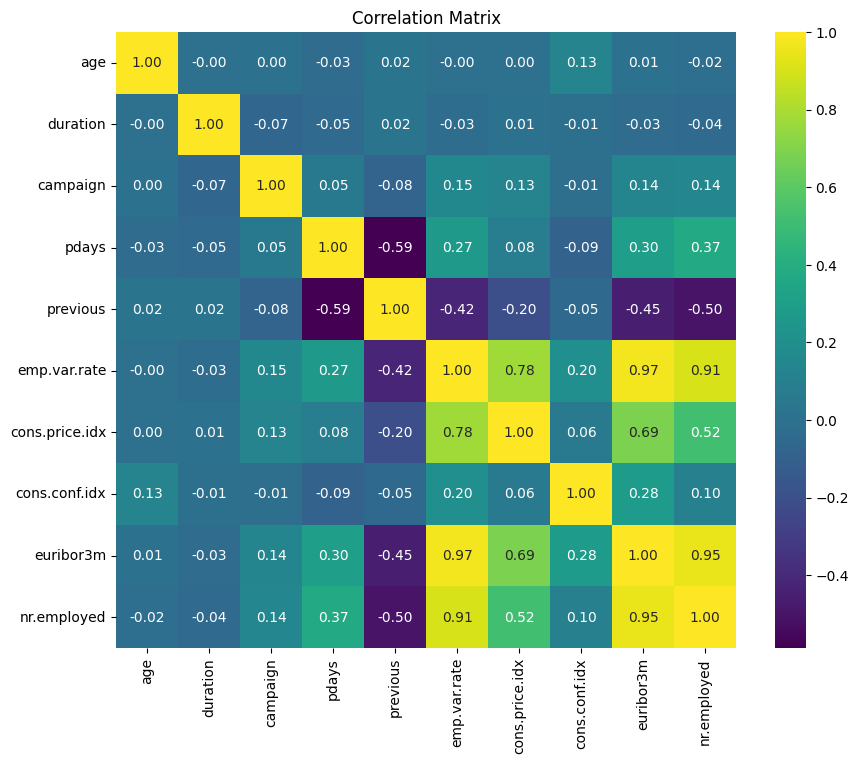

In [24]:
# Correlation matrix for numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


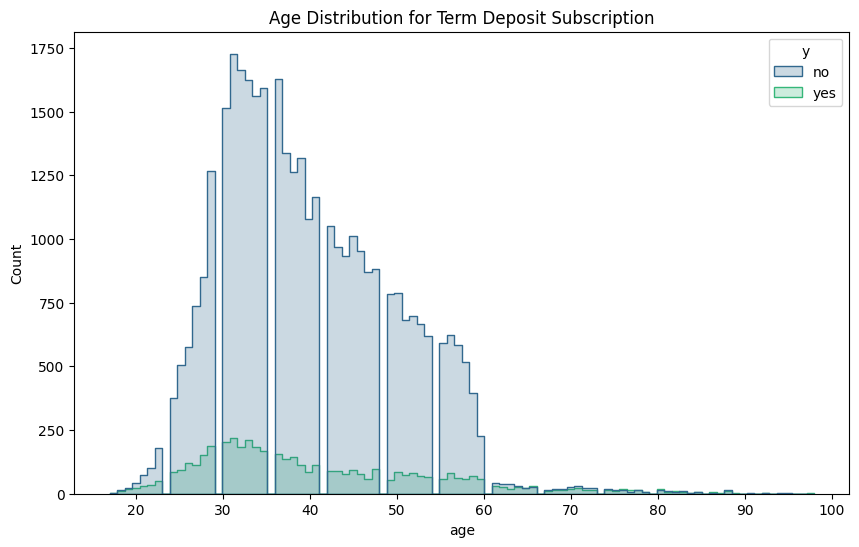

In [25]:

# Visualizing the distribution of age for subscribed and not subscribed clients
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=df, hue='y', element='step', stat='count', common_norm=False, palette='viridis')
plt.title('Age Distribution for Term Deposit Subscription')
plt.show()


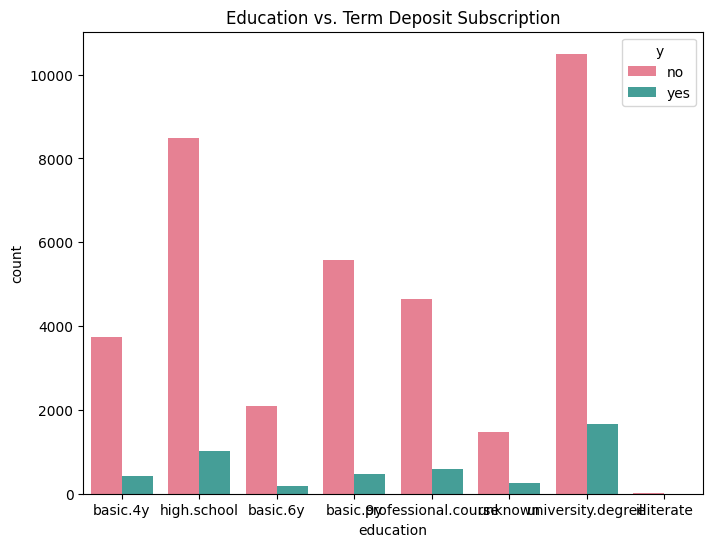

In [26]:
# Visualizing the impact of education on term deposit subscription
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='y', data=df, palette='husl')
plt.title('Education vs. Term Deposit Subscription')
plt.show()

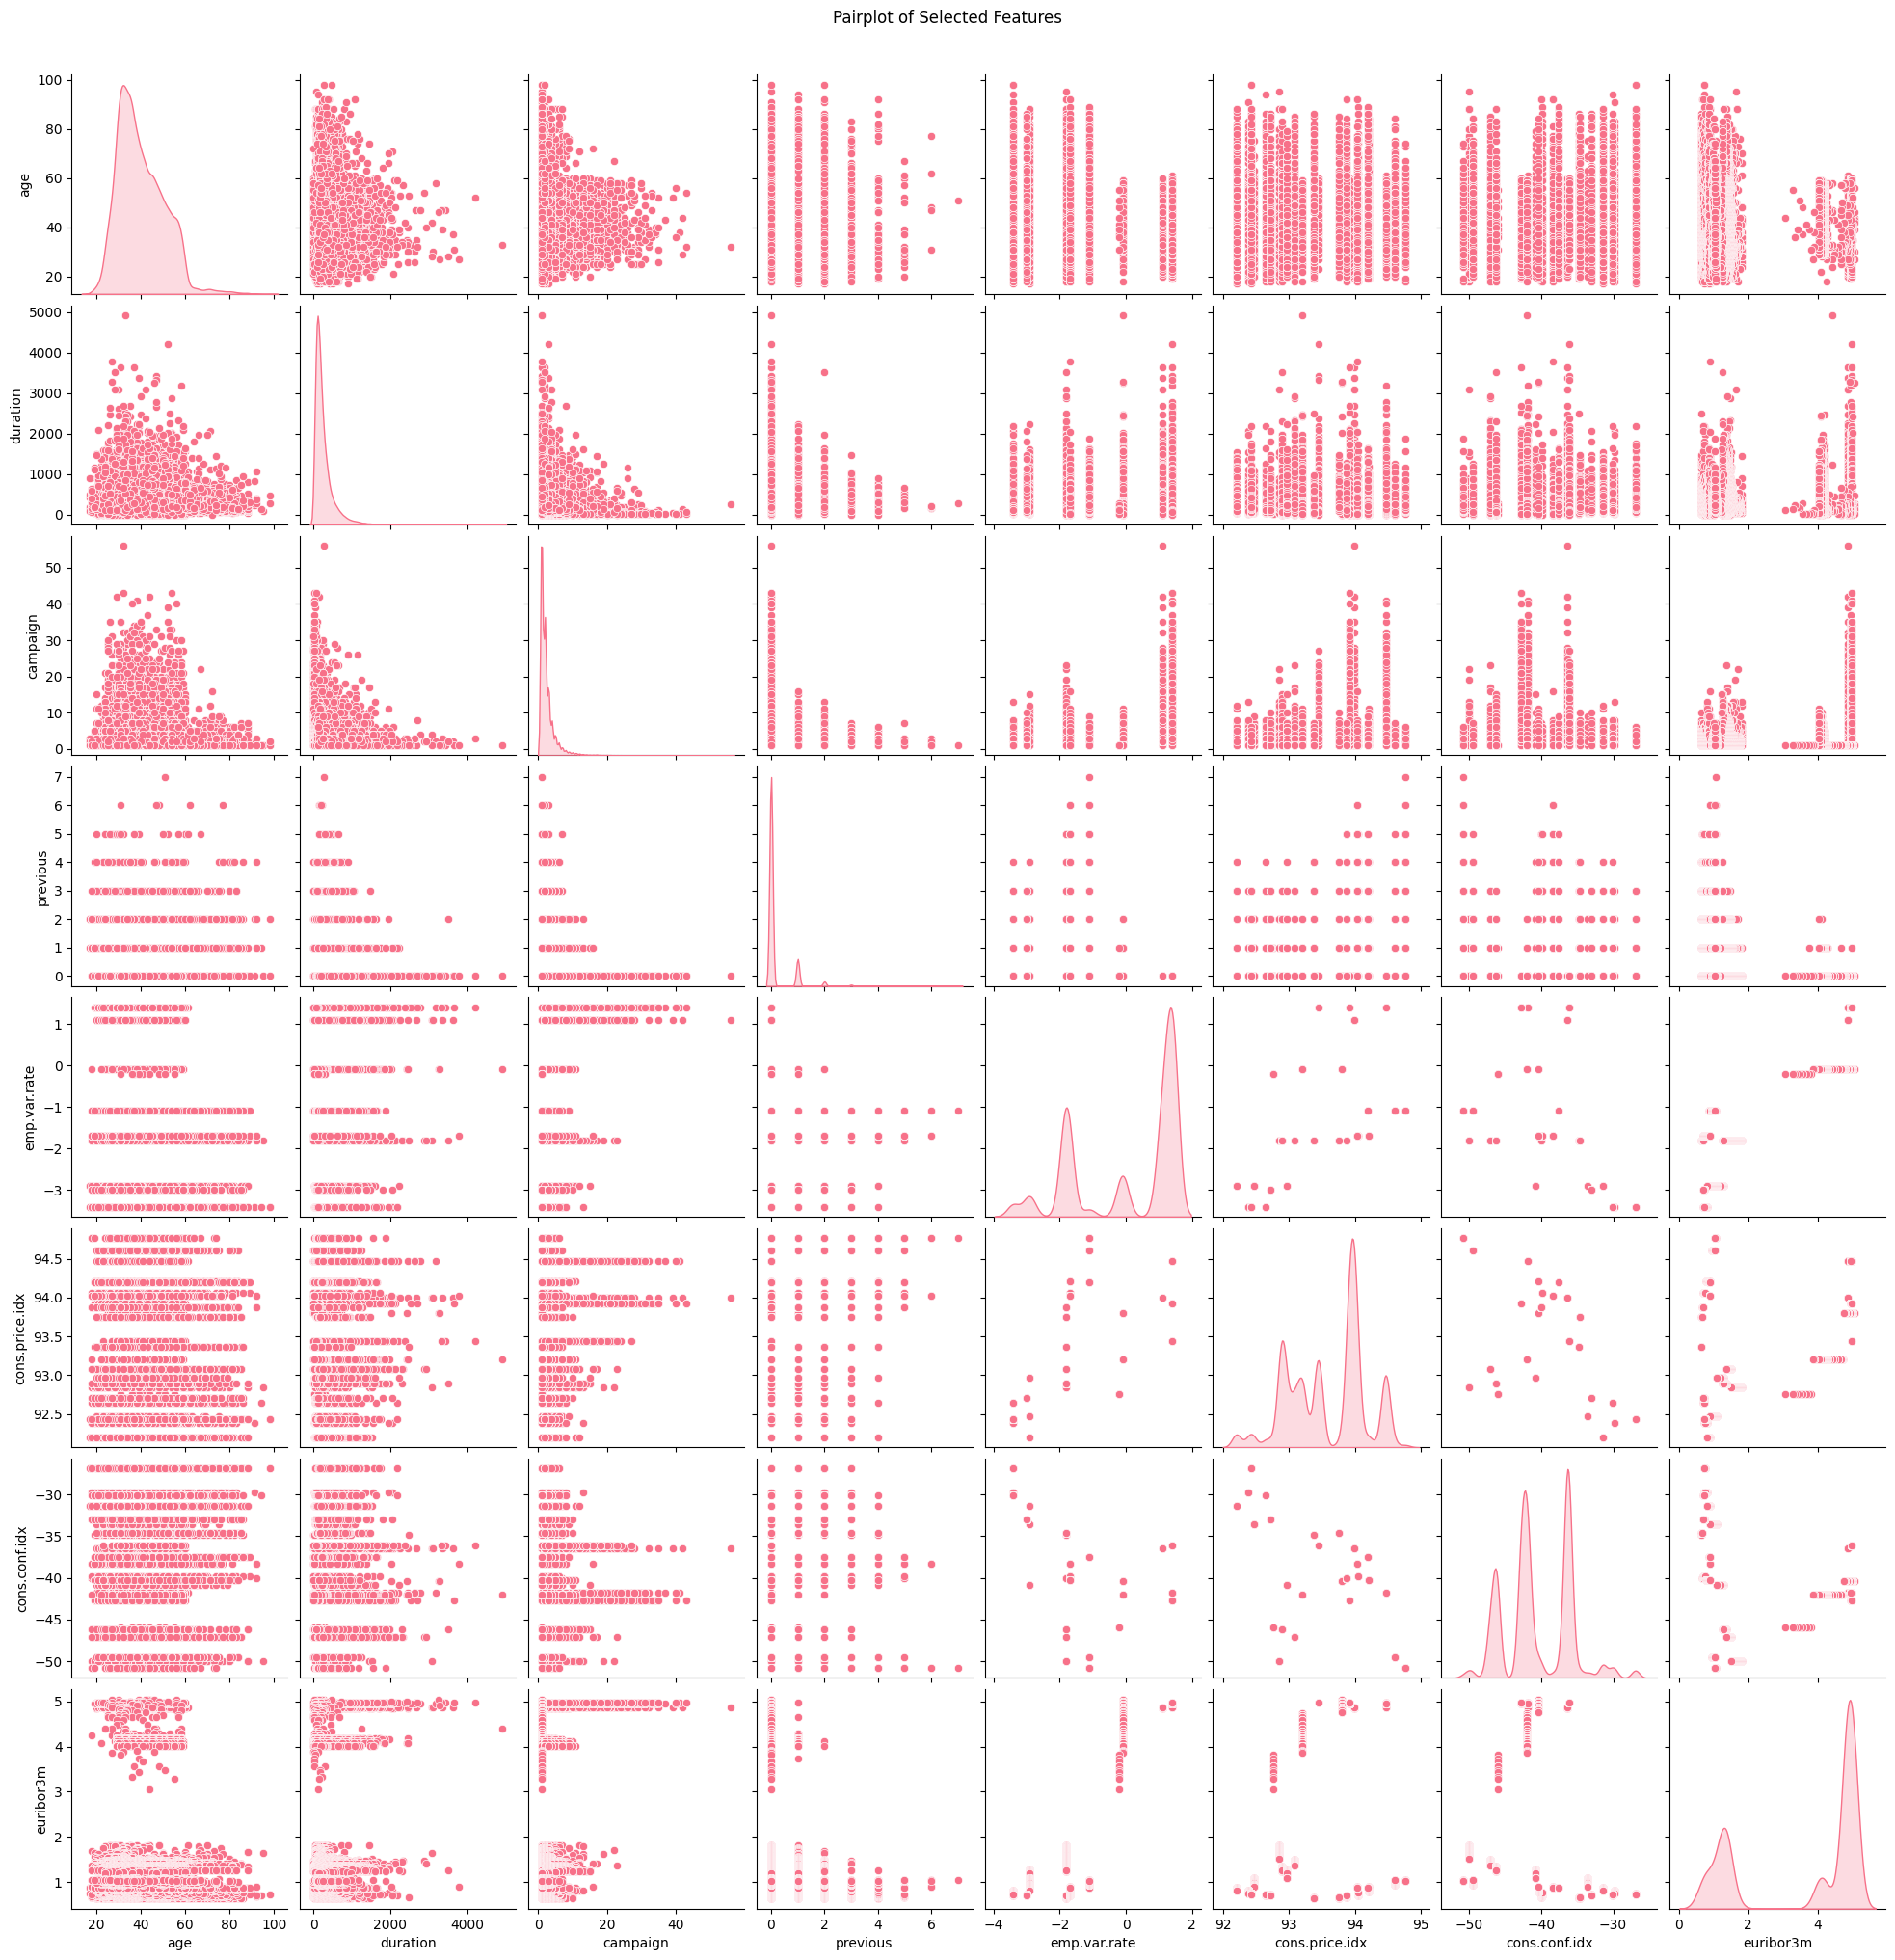

In [27]:
# Pairplot for selected features
selected_features = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()



---


<marquee style='width: 50%; color: green;'><b><I>Now that the visualisation is over , now its time for Preprocessing the data so that we can feed it into the model </I></b></marquee>


---



In [28]:
# Drop any rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))

# Define features (X) and target variable (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---


<marquee style='width: 50%; color: green;'><b><I>Now that the data is processed , we can now define the ML models and feed them straight into the model and see thier performance </I></b></marquee>



---



In [31]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000)
}
models1=[]
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy*100:.2f}%")
    models1.append(model)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 90.91%
Decision Tree Accuracy: 88.86%
Random Forest Accuracy: 91.51%
Support Vector Machine Accuracy: 89.45%
k-Nearest Neighbors Accuracy: 90.23%
Gradient Boosting Accuracy: 91.98%
Naive Bayes Accuracy: 85.06%
Neural Network Accuracy: 87.86%


<ipython-input-39-b43fdf951474>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 4, i)
<ipython-input-39-b43fdf951474>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 4, i)
<ipython-input-39-b43fdf951474>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 4, i)
<ipython-input-39-b43fdf951474>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 4, i)
<ipython-input-39-b43fdf951474>:15: MatplotlibDeprecatio

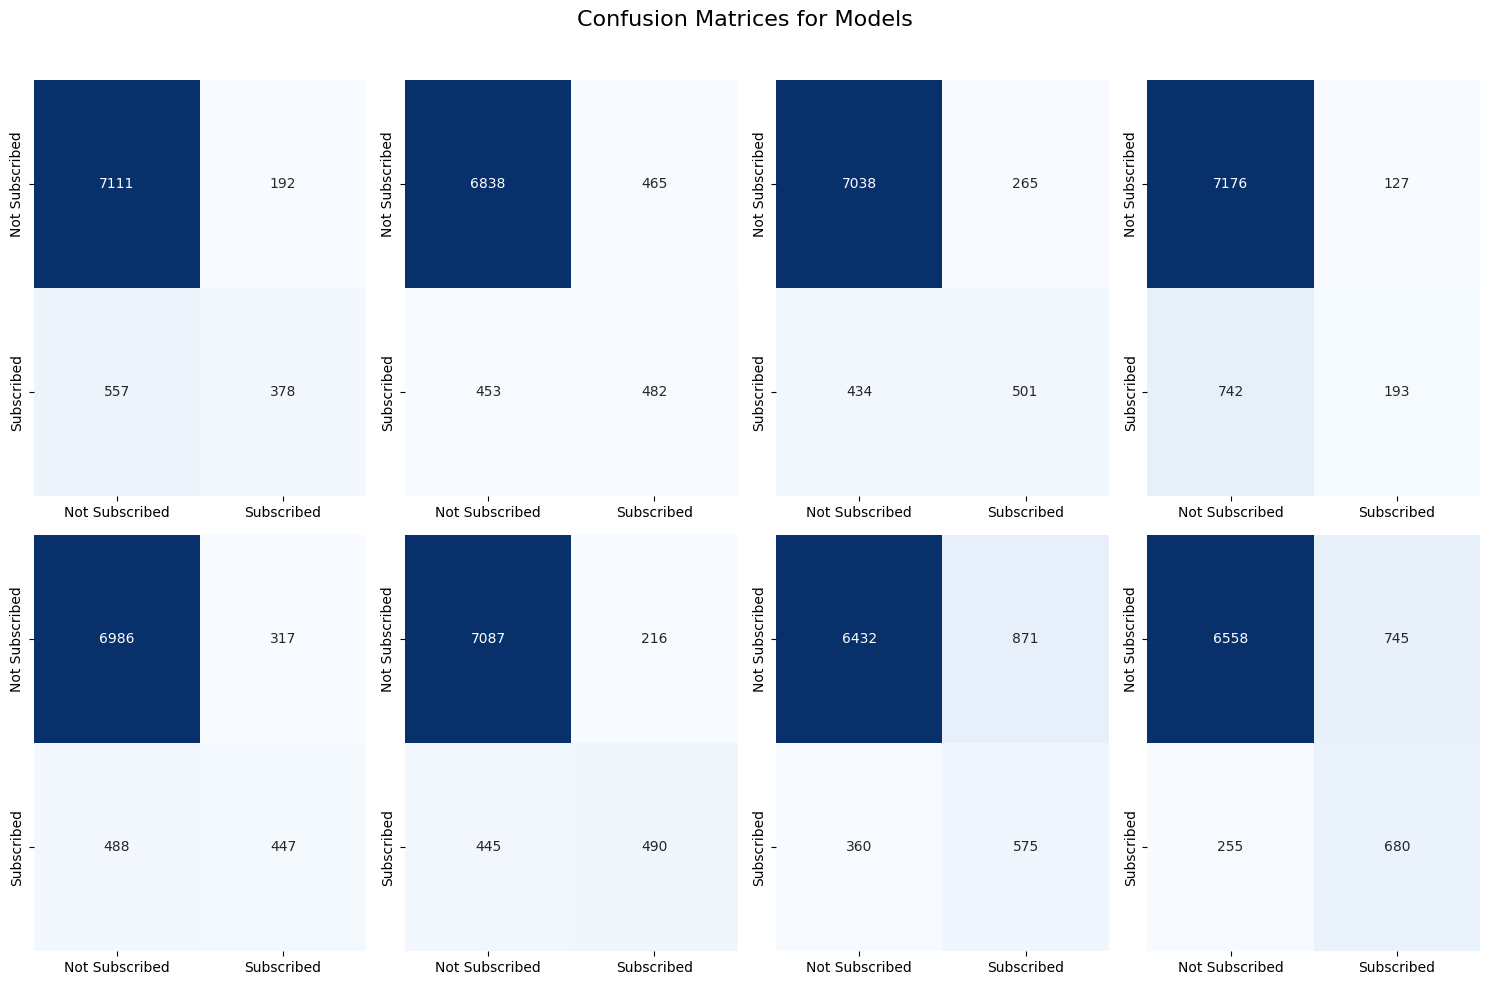

In [39]:
from sklearn.metrics import confusion_matrix

# Create subplots for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Confusion Matrices for Models', fontsize=16)

for i, model in enumerate(models1, 1):
    # Predictions on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    ax = plt.subplot(2, 4, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Subscribed', 'Subscribed'],
                yticklabels=['Not Subscribed', 'Subscribed'])
    # plt.title(f'{model[i-1]} Confusion Matrix')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



---

Now its time to feed the data into some nueral networks and see how they perform


---



In [18]:

# Define and train deep learning models
models = []

# Model 1
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
models.append(model1)

# Model 2
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
models.append(model2)

# Model 3
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
models.append(model3)

# Model 4
model4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
models.append(model4)

# Model 5
model5 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
models.append(model5)

# Evaluate the models
for i, model in enumerate(models, start=1):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model {i} Accuracy: {accuracy}")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=accuracie, y=model_names, palette='viridis')
    plt.title('Model Accuracies on Test Set')
    plt.xlabel('Accuracy')
    plt.ylabel('Model')
    plt.show()

258/258 [==============================] - 1s 2ms/step
Model 1 Accuracy: 0.9084729303228939
258/258 [==============================] - 1s 3ms/step
Model 2 Accuracy: 0.9093226511289147
258/258 [==============================] - 1s 3ms/step
Model 3 Accuracy: 0.8924496236950716
258/258 [==============================] - 1s 3ms/step
Model 4 Accuracy: 0.9041029376062151
258/258 [==============================] - 1s 2ms/step
Model 5 Accuracy: 0.9090798737557659


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming you have your DataFrame loaded and preprocessed, with X_train, X_test, y_train, y_test

# Define and apply label encoding for categorical variables
le = LabelEncoder()
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Create a deep learning model with many layers and dropout for regularization
model = Sequential()

model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=8, batch_size=64, validation_split=0.1, verbose=1)
model6=model
# Evaluate the model on the test set
y_pred = (model6.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Epoch 1/8
464/464 [==============================] - 5s 5ms/step - loss: 8.3088 - accuracy: 0.7843 - val_loss: 0.5641 - val_accuracy: 0.8841
Epoch 2/8
464/464 [==============================] - 3s 6ms/step - loss: 0.7548 - accuracy: 0.8457 - val_loss: 0.4924 - val_accuracy: 0.8841
Epoch 3/8
464/464 [==============================] - 3s 6ms/step - loss: 0.4794 - accuracy: 0.8699 - val_loss: 0.4095 - val_accuracy: 0.8841
Epoch 4/8
464/464 [==============================] - 2s 5ms/step - loss: 0.4076 - accuracy: 0.8820 - val_loss: 0.3845 - val_accuracy: 0.8841
Epoch 5/8
464/464 [==============================] - 2s 5ms/step - loss: 0.3766 - accuracy: 0.8852 - val_loss: 0.3679 - val_accuracy: 0.8841
Epoch 6/8
464/464 [==============================] - 2s 5ms/step - loss: 0.3665 - accuracy: 0.8855 - val_loss: 0.3623 - val_accuracy: 0.8841
Epoch 7/8
464/464 [==============================] - 3s 6ms/step - loss: 0.3577 - accuracy: 0.8867 - val_loss: 0.3631 - val_accuracy: 0.8841
Epoch 8/8
258

258/258 [==============================] - 0s 2ms/step


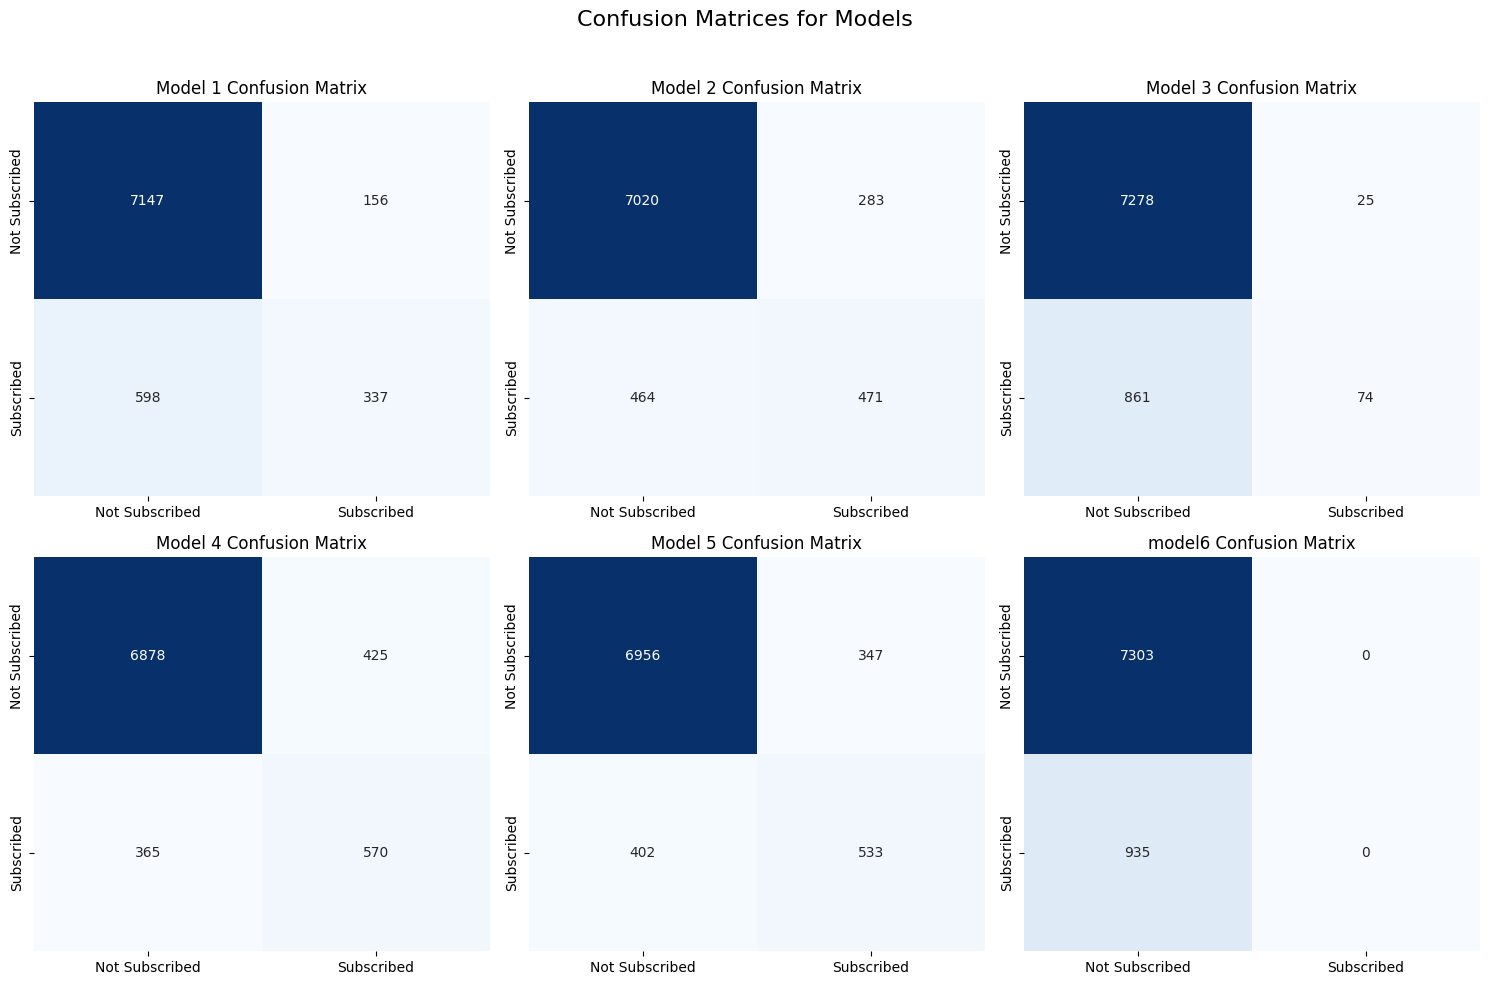

In [44]:

models = [model1, model2, model3, model4, model5,model6]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5','model6']

# Create subplots for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Confusion Matrices for Models', fontsize=16)

for i, model in enumerate(models, 1):
    # Predictions on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    ax = plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Subscribed', 'Subscribed'],
                yticklabels=['Not Subscribed', 'Subscribed'])
    plt.title(f'{model_names[i-1]} Confusion Matrix')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()